<a href="https://colab.research.google.com/github/gauravraidata/IITJ-projects/blob/main/Assignment1(DP%2CLR%2CSVM%2CRF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

You have been provided with a CSV file "Cars93.csv." The given dataset is related to cars and
contains 26 columns. In the given dataset, “Price” is the target variable (i.e., the output). The
marks distribution according to the tasks are as follows:
1. Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and
(d) Airbags from the following: ordinal/nominal/ratio/interval scale.
2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).
3. Write a function to reduce noise (any error in the feature) in individual attributes.
4. Write a function to encode all the categorical features in the dataset according to the
type of variable jointly.
5. Write a function to normalize / scale the features either individually or jointly.
6. Write a function to create a random split of the data into train, validation and test sets in
the ratio of [70:20:10].

###Data Preprocessing

In [63]:
import requests
from io import StringIO

# Shared link
url = "https://drive.google.com/uc?export=download&id=1Vzn32gMwtCU4IBiNXezZvDPcs1JdTXvt"

# Get the file content
response = requests.get(url)
response.raise_for_status()

# Convert to a pandas DataFrame
csv_data = StringIO(response.text)
Car_df = pd.read_csv(csv_data)

#Cars = pd.read_csv('/content/drive/MyDrive/Assignment files/Ass1 ML/Cars93.csv')
#Cars.head(10)

In [64]:
# Loading the dataset stored in drive folder and previewing

Cars = Car_df
Cars.head(10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,16.4,6,189,105,69,41,28.0,16.0,2880,USA
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,18.0,6,200,111,74,42,30.5,17.0,3470,USA
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,23.0,6,216,116,78,45,30.5,21.0,4105,USA
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,18.8,5,198,108,73,41,26.5,14.0,3495,USA
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,18.0,6,206,114,73,43,35.0,18.0,3620,USA


####**1.** Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and(d) Airbags from the following: ordinal/nominal/ratio/interval scale.



*   *Model - Nominal  (only name, no order, no interval, no ratio possible)*
*   *Type - Nominal (name)*

*   *Max.Price - Ratio (price can be zero and we can find the ration between min and max price)*
*   *Airbags - Ordinal (name and 2 stages)*





In [65]:
Cars[['Model', 'Type', 'Max.Price', 'AirBags']]

,Model,Type,Max.Price,AirBags
0,Integra,Small,18.8,NaN
1,Legend,Midsize,38.7,Driver & Passenger
2,90,Compact,32.3,Driver only
3,100,Midsize,44.6,Driver & Passenger
4,535i,Midsize,36.2,Driver only
...,...,...,...,...
88,Eurovan,Van,22.7,NaN
89,Passat,Compact,22.4,NaN
90,Corrado,Sporty,23.7,NaN
91,240,Compact,23.5,Driver only


In [66]:
l = ['Model', 'Type', 'Max.Price', 'AirBags']
for i in l:
  number_of_unique_values = Cars[i].value_counts().count()
  print(f'Number of unique values in {i} is {number_of_unique_values}')

Number of unique values in Model is 93
Number of unique values in Type is 6
Number of unique values in Max.Price is 79
Number of unique values in AirBags is 2


####2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).

In [67]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [68]:
# total num values in df
Cars.isnull().sum().sum()

47

In [69]:
# airbag have highest null values count, checking all unique values
Cars['AirBags'].unique()

array([nan, 'Driver & Passenger', 'Driver only'], dtype=object)

In [70]:
#following function will fill the missing data with mode of the series for object and mean for int
def handle_missing_values(value):
    if value.isnull().any():
        if value.dtype == 'object':
            mode = value.mode()
            return value.fillna(mode[0])
        else:
            mean = value.mean()
            return value.fillna(mean)
    return value


In [71]:
#there are missing values in AirBags,Rear.seat.room , Luggage.room columns using created function to handle them
cars1 = Cars.copy()
missing_value_col = ['AirBags', 'Rear.seat.room', 'Luggage.room']
for i in missing_value_col:
  cars1[i] = handle_missing_values(cars1[i])

In [72]:
#cheching if there is any null value left
cars1.isnull().sum().sum()

0

In [73]:
missing_value_col = ['AirBags', 'Rear.seat.room', 'Luggage.room']
for i in missing_value_col:
  Cars[i] = handle_missing_values(Cars[i])

Cars.isnull().sum().sum()

0

####3. Write a function to reduce noise (any error in the feature) in individual attributes.

In [74]:
#checking number of unique values of numerical dataset

unique_valuesn_list = []

for i in Cars.columns:
    if Cars[i].dtype != 'object':
        unique_values = Cars[i].unique()
        unique_valuesn_list.append({'Column': i, 'Unique Values': unique_values})
    else:
        continue

unique_valuesn_df = pd.DataFrame(unique_valuesn_list)

unique_valuesn_df.head(100)

#creating hist plot of unique_valuesn_df with each bin of 10% of total value range




,Column,Unique Values
0,Min.Price,"[12.9, 29.2, 25.9, 30.8, 23.7, 14.2, 19.9, 22...."
1,Price,"[15.9, 33.9, 29.1, 37.7, 30.0, 15.7, 20.8, 23...."
2,Max.Price,"[18.8, 38.7, 32.3, 44.6, 36.2, 17.3, 21.7, 24...."
3,MPG.city,"[25, 18, 20, 19, 22, 16, 21, 15, 17, 23, 29, 3..."
4,MPG.highway,"[31, 25, 26, 30, 28, 27, 36, 34, 29, 23, 20, 3..."
5,EngineSize,"[1.8, 3.2, 2.8, 3.5, 2.2, 3.8, 5.7, 4.9, 4.6, ..."
6,Horsepower,"[140, 200, 172, 208, 110, 170, 180, 295, 160, ..."
7,RPM,"[6300, 5500, 5700, 5200, 4800, 4000, 4100, 600..."
8,Rev.per.mile,"[2890, 2335, 2280, 2535, 2545, 2565, 1570, 132..."
9,Fuel.tank.capacity,"[13.2, 18.0, 16.9, 21.1, 16.4, 23.0, 18.8, 20...."


Passengers should not be part of numerical info as it is a categorical information with respect to cars, hence changing its datatype to object

In [75]:
Cars['Passengers'] = Cars['Passengers'].astype('object')

In [76]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [77]:
#creating list of categorical and numerical columns for future references
categorical_columns = Cars.select_dtypes(include=['object']).columns
numerical_columns = Cars.select_dtypes(include=['int64', 'float64']).columns

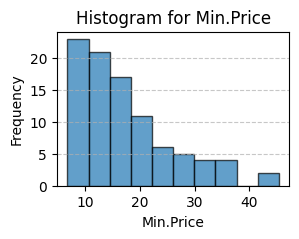

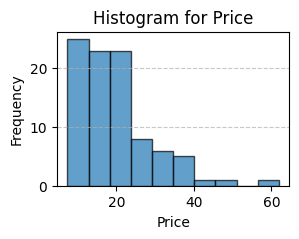

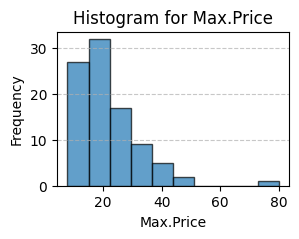

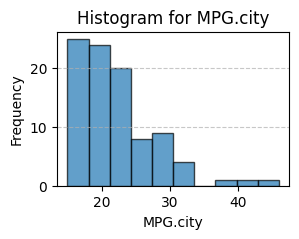

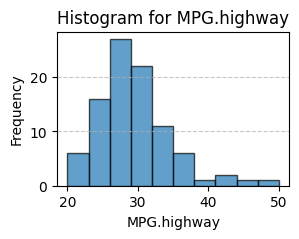

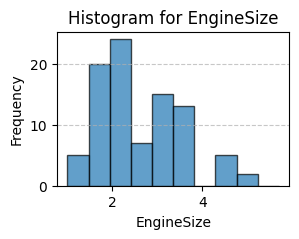

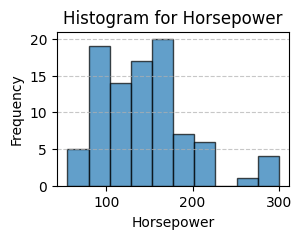

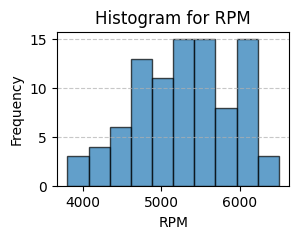

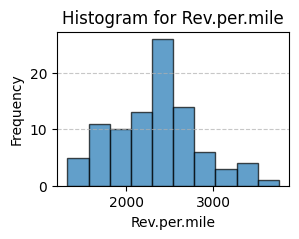

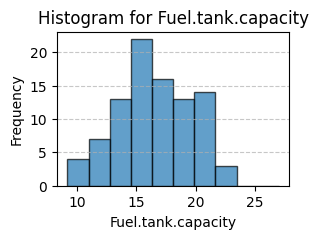

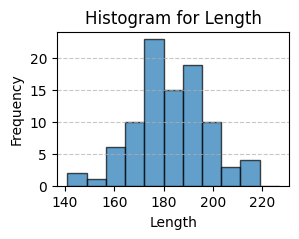

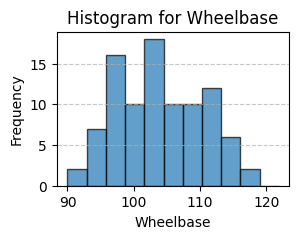

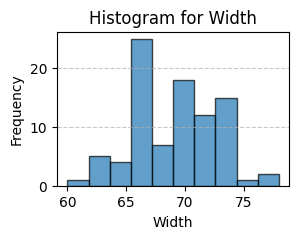

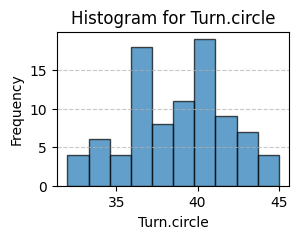

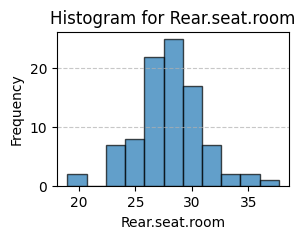

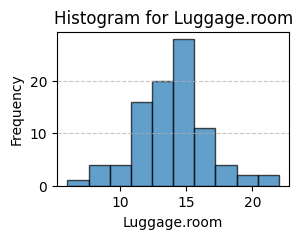

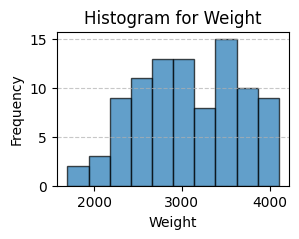

In [78]:
for i in Cars.columns:
    if Cars[i].dtype != 'object':
        total_range = Cars[i].max() - Cars[i].min()
        bin_width = total_range / 10
        bins = np.arange(Cars[i].min(), Cars[i].max() + bin_width, bin_width)

        plt.figure(figsize=(3, 2))
        plt.hist(Cars[i].dropna(), bins=bins, edgecolor='black', alpha=0.7)
        plt.title(f'Histogram for {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

In [79]:
#checking unique values of all the categprical features in Cars

unique_values_list = []

for i in Cars.columns:
    if Cars[i].dtype == 'object':
        unique_values = Cars[i].unique()
        unique_values_list.append({'Column': i, 'Unique Values': unique_values})
    else:
        continue

unique_values_df = pd.DataFrame(unique_values_list)

unique_values_df.head(100)

,Column,Unique Values
0,Manufacturer,"[Acura, Audi, BMW, Buick, Cadillac, Chevrolet,..."
1,Model,"[Integra, Legend, 90, 100, 535i, Century, LeSa..."
2,Type,"[Small, Midsize, Compact, Large, Sporty, Van]"
3,AirBags,"[Driver only, Driver & Passenger]"
4,DriveTrain,"[Front, Rear, 4WD]"
5,Cylinders,"[4, 6, 8, 3, rotary, 5]"
6,Man.trans.avail,"[Yes, No]"
7,Passengers,"[5, 6, 4, 7, 8, 2]"
8,Origin,"[non-USA, USA]"


In [80]:
#there are few noises present in the calegorical columns like Manufacturer have duplicate value 'Chrylser' 'Chrysler' due to spelling mistake and cylinder column have value rotary which is different category of engine
#handling this errors

Cars['Manufacturer'] = Cars['Manufacturer'].replace('Chrylser', 'Chrysler')

#removing row with rotary
Cars = Cars[Cars['Cylinders'] != 'rotary']

In [81]:
#checking again

unique_values_list = []

for i in Cars.columns:
    if Cars[i].dtype == 'object':
        unique_values = Cars[i].unique()
        unique_values_list.append({'Column': i, 'Unique Values': unique_values})
    else:
        continue

unique_values_df = pd.DataFrame(unique_values_list)

unique_values_df.head(100)

,Column,Unique Values
0,Manufacturer,"[Acura, Audi, BMW, Buick, Cadillac, Chevrolet,..."
1,Model,"[Integra, Legend, 90, 100, 535i, Century, LeSa..."
2,Type,"[Small, Midsize, Compact, Large, Sporty, Van]"
3,AirBags,"[Driver only, Driver & Passenger]"
4,DriveTrain,"[Front, Rear, 4WD]"
5,Cylinders,"[4, 6, 8, 3, 5]"
6,Man.trans.avail,"[Yes, No]"
7,Passengers,"[5, 6, 4, 7, 8, 2]"
8,Origin,"[non-USA, USA]"


####4. Write a function to encode all the categorical features in the dataset according to the type of variable jointly.

In [82]:
# listing categorical data

for i in Cars.columns:
  if Cars[i].dtype == 'object':
    number_of_unique_values = Cars[i].value_counts().count()
    print(f'Number of unique values in {i} is {number_of_unique_values}')
  else:
    continue

Number of unique values in Manufacturer is 31
Number of unique values in Model is 92
Number of unique values in Type is 6
Number of unique values in AirBags is 2
Number of unique values in DriveTrain is 3
Number of unique values in Cylinders is 5
Number of unique values in Man.trans.avail is 2
Number of unique values in Passengers is 6
Number of unique values in Origin is 2


In [83]:
l = ['DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin','Passengers']
for i in l:
  u = Cars[i].unique()
  print(u)

['Front' 'Rear' '4WD']
['4' '6' '8' '3' '5']
['Yes' 'No']
['non-USA' 'USA']
[5 6 4 7 8 2]


We already know that Manufacturer, Model, Type are nominal and Airbag is ordinal. As per above values we can conclude that Origin, Man.trans.avail, DriveTrain are nominal, passengers and Cylinders are ordinal except '*rotary*' as it is different category.

In [84]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        92 non-null     object 
 1   Model               92 non-null     object 
 2   Type                92 non-null     object 
 3   Min.Price           92 non-null     float64
 4   Price               92 non-null     float64
 5   Max.Price           92 non-null     float64
 6   MPG.city            92 non-null     int64  
 7   MPG.highway         92 non-null     int64  
 8   AirBags             92 non-null     object 
 9   DriveTrain          92 non-null     object 
 10  Cylinders           92 non-null     object 
 11  EngineSize          92 non-null     float64
 12  Horsepower          92 non-null     int64  
 13  RPM                 92 non-null     int64  
 14  Rev.per.mile        92 non-null     int64  
 15  Man.trans.avail     92 non-null     object 
 16  Fuel.tank.capac

In [85]:
#classifying ordinal and nominal columns in list

ordinal_col = ['AirBags','Passengers', 'Cylinders']
nominal_col = ['Manufacturer', 'Model', 'Type', 'Origin', 'Man.trans.avail', 'DriveTrain']

Creating function for encoding the categorical features with help pf sklearn

In [86]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

Creating function

In [87]:

def encode_categorical_features(dataset, ordinal_columns, nominal_columns):
    ordinal_encoder = OrdinalEncoder()
    nominal_encoder = OneHotEncoder(sparse_output= False)

    for i in ordinal_columns:
      dataset[i] = ordinal_encoder.fit_transform(dataset[[i]])

    for i in nominal_columns:
      dataset[i] = nominal_encoder.fit_transform(dataset[[i]])

    return dataset

In [88]:
#checking by creating a new dataframe
cars2 = encode_categorical_features(Cars, ordinal_col, nominal_col)
cars2.head()

<ipython-input-87-97fb9fd78f64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = ordinal_encoder.fit_transform(dataset[[i]])
<ipython-input-87-97fb9fd78f64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = ordinal_encoder.fit_transform(dataset[[i]])
<ipython-input-87-97fb9fd78f64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,1.0,0.0,0.0,12.9,15.9,18.8,25,31,1.0,0.0,...,13.2,2.0,177,102,68,37,26.5,11.0,2705,0.0
1,1.0,0.0,0.0,29.2,33.9,38.7,18,25,0.0,0.0,...,18.0,2.0,195,115,71,38,30.0,15.0,3560,0.0
2,0.0,0.0,1.0,25.9,29.1,32.3,20,26,1.0,0.0,...,16.9,2.0,180,102,67,37,28.0,14.0,3375,0.0
3,0.0,1.0,0.0,30.8,37.7,44.6,19,26,0.0,0.0,...,21.1,3.0,193,106,70,37,31.0,17.0,3405,0.0
4,0.0,0.0,0.0,23.7,30.0,36.2,22,30,1.0,0.0,...,21.1,1.0,186,109,69,39,27.0,13.0,3640,0.0


In [89]:
#applying function on the main data frame
ordinal_col = ['AirBags','Passengers', 'Cylinders']
nominal_col = ['Manufacturer', 'Model', 'Type', 'Origin', 'Man.trans.avail', 'DriveTrain']
Cars = encode_categorical_features(Cars, ordinal_col, nominal_col)
Cars.head()

<ipython-input-87-97fb9fd78f64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = ordinal_encoder.fit_transform(dataset[[i]])
<ipython-input-87-97fb9fd78f64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = ordinal_encoder.fit_transform(dataset[[i]])
<ipython-input-87-97fb9fd78f64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,0.0,1.0,1.0,12.9,15.9,18.8,25,31,1.0,1.0,...,13.2,2.0,177,102,68,37,26.5,11.0,2705,1.0
1,0.0,1.0,1.0,29.2,33.9,38.7,18,25,0.0,1.0,...,18.0,2.0,195,115,71,38,30.0,15.0,3560,1.0
2,1.0,1.0,0.0,25.9,29.1,32.3,20,26,1.0,1.0,...,16.9,2.0,180,102,67,37,28.0,14.0,3375,1.0
3,1.0,0.0,1.0,30.8,37.7,44.6,19,26,0.0,1.0,...,21.1,3.0,193,106,70,37,31.0,17.0,3405,1.0
4,1.0,1.0,1.0,23.7,30.0,36.2,22,30,1.0,1.0,...,21.1,1.0,186,109,69,39,27.0,13.0,3640,1.0


####5. Write a function to normalize / scale the features either individually or jointly.

In [90]:
#scalling the numerical features
from sklearn.preprocessing import MinMaxScaler

In [91]:
numerical_columns = list(numerical_columns)
numerical_columns

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [92]:
#creating a function for scaling the numerical columns in the dataset

def scale_numerical_features(dataset, numerical_columns):
    scaler = MinMaxScaler()
    dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])
    return dataset

In [93]:
#testing the function
cars3 = scale_numerical_features(Cars, numerical_columns)
cars3.head()

<ipython-input-92-fc3a6648c9a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,0.0,1.0,1.0,0.160207,0.155963,0.151179,0.322581,0.366667,1.0,1.0,...,0.224719,2.0,0.461538,0.413793,0.444444,0.384615,0.441176,0.3125,0.419087,1.0
1,0.0,1.0,1.0,0.581395,0.486239,0.427184,0.096774,0.166667,0.0,1.0,...,0.494382,2.0,0.692308,0.862069,0.611111,0.461538,0.647059,0.5625,0.773859,1.0
2,1.0,1.0,0.0,0.496124,0.398165,0.338419,0.161290,0.200000,1.0,1.0,...,0.432584,2.0,0.500000,0.413793,0.388889,0.384615,0.529412,0.5000,0.697095,1.0
3,1.0,0.0,1.0,0.622739,0.555963,0.509015,0.129032,0.200000,0.0,1.0,...,0.668539,3.0,0.666667,0.551724,0.555556,0.384615,0.705882,0.6875,0.709544,1.0
4,1.0,1.0,1.0,0.439276,0.414679,0.392510,0.225806,0.333333,1.0,1.0,...,0.668539,1.0,0.576923,0.655172,0.500000,0.538462,0.470588,0.4375,0.807054,1.0


In [94]:
#applying on main dataframe

Cars = scale_numerical_features(Cars, numerical_columns)
Cars.head()

<ipython-input-92-fc3a6648c9a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,0.0,1.0,1.0,0.160207,0.155963,0.151179,0.322581,0.366667,1.0,1.0,...,0.224719,2.0,0.461538,0.413793,0.444444,0.384615,0.441176,0.3125,0.419087,1.0
1,0.0,1.0,1.0,0.581395,0.486239,0.427184,0.096774,0.166667,0.0,1.0,...,0.494382,2.0,0.692308,0.862069,0.611111,0.461538,0.647059,0.5625,0.773859,1.0
2,1.0,1.0,0.0,0.496124,0.398165,0.338419,0.161290,0.200000,1.0,1.0,...,0.432584,2.0,0.500000,0.413793,0.388889,0.384615,0.529412,0.5000,0.697095,1.0
3,1.0,0.0,1.0,0.622739,0.555963,0.509015,0.129032,0.200000,0.0,1.0,...,0.668539,3.0,0.666667,0.551724,0.555556,0.384615,0.705882,0.6875,0.709544,1.0
4,1.0,1.0,1.0,0.439276,0.414679,0.392510,0.225806,0.333333,1.0,1.0,...,0.668539,1.0,0.576923,0.655172,0.500000,0.538462,0.470588,0.4375,0.807054,1.0


####6. Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10].

In [95]:
#creating the function for spliting the dataset in 3 parts
from sklearn.model_selection import train_test_split

In [96]:
def split_dataset(dataset):
    tr_ratio = 0.7
    val_ratio = 0.2

    train_size = int(len(dataset) * tr_ratio)
    validation_size = int(len(dataset) * val_ratio)

    dataset = dataset.sample(frac=1, random_state=42)

    train_set = dataset[:train_size]
    validation_set = dataset[train_size:train_size + validation_size]
    test_set = dataset[train_size + validation_size:]

    return train_set, validation_set, test_set

In [97]:
#testing the function
train_set, validation_set, test_set = split_dataset(Cars)
train_set.shape, validation_set.shape, test_set.shape

((64, 26), (18, 26), (10, 26))

In [98]:
#creating another function with help of sklearn

def split_dataset_sklearn(dataset):
    train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)
    validation_set, test_set = train_test_split(test_set, test_size=0.33, random_state=42)
    return train_set, validation_set, test_set

In [99]:
#testing the function
train_set, validation_set, test_set = split_dataset_sklearn(Cars)
train_set.shape, validation_set.shape, test_set.shape

((64, 26), (18, 26), (10, 26))

# Question 2

###Q2a: Linear Regression Task.

Use the “linear_regression_dataset.csv”
Implement the linear regression model to predict the dependency between two variables.
1. Implement linear regression using the inbuilt function “LinearRegression” model in
sklearn.
2. Print the coefficient obtained from linear regression and plot a straight line on the scatter
plot.
3. Now, implement linear regression without the use of any inbuilt function.
4. Compare the results of 1 and 3 graphically.

In [100]:
url2 = "https://drive.google.com/uc?export=download&id=1wfYGxmBa6BzzlTPAkOkzyQKcnh0PZkF_"

response2 = requests.get(url2)
response2.raise_for_status()

linear_regression_dataset_data = StringIO(response2.text)
linear_regression_dataset_df = pd.read_csv(linear_regression_dataset_data)

#Linear_reg = pd.read_csv('/content/drive/MyDrive/Assignment files/Ass1 ML/linear_regression_dataset.csv')
#Linear_reg.head()

In [101]:
Linear_reg = linear_regression_dataset_df
Linear_reg.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [102]:
Linear_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Height   15 non-null     float64
 1   Weight   15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [103]:
Linear_reg.columns

Index(['Height ', 'Weight'], dtype='object')

Column Height name have a extra space at the end, we should trim it  

In [104]:
Linear_reg.columns = Linear_reg.columns.str.strip()

In [105]:
Linear_reg.columns

Index(['Height', 'Weight'], dtype='object')

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
x = Linear_reg[['Height']]
y = Linear_reg['Weight']

In [108]:
#creating the linear regression model

model = LinearRegression()

model.fit(x, y)

y2 = model.predict(x)


In [109]:
#coeficient obtained
print(model.coef_)

[61.27218654]


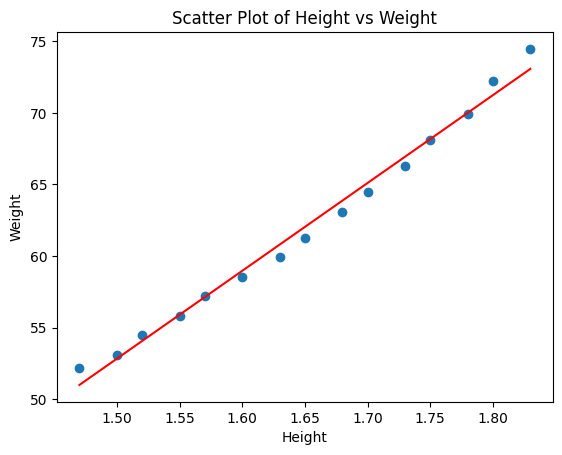

In [110]:
#ploting a scatter plot comparing y2 and y

plt.scatter(x, y)
plt.plot(x, y2, color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight')
plt.show()

In [111]:
#creating linear regressor without using sklearn and using ordinary least square method

def linear_regressor(x, y):
    x_mean = np.mean(x['Height'])
    y_mean = np.mean(y)

    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x['Height'][i] - x_mean) * (y[i] - y_mean)
        denominator += (x['Height'][i] - x_mean) ** 2

    slope = numerator / denominator
    intercept = y_mean - (slope * x_mean)
    return slope, intercept

def predict(x, slope, intercept):
    return slope * x + intercept

In [112]:
slope, intercept = linear_regressor(x, y)

y_pred = []
for i in x['Height']:
    p = predict(i, slope, intercept)
    y_pred.append(p)

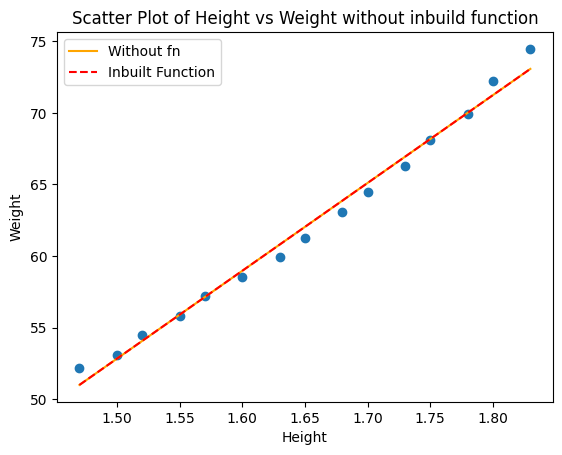

In [113]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='orange', linestyle='-', label = 'Without fn')
plt.plot(x, y2, color='red',linestyle='--', label='Inbuilt Function')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight without inbuild function')
plt.legend()
plt.show()

###Q2b: Logistic Regression Task.

Use the “logistic_regression_dataset.csv”
1. Split the dataset into training set and test set in the ratio of 70:30 or 80:20
2. Train the logistic regression classifier (using inbuilt function: LogisticRegression from
sklearn).
3. Print the confusion matrix and accuracy.

#####Preprocessing

In [116]:
Logistic_reg = pd.read_csv('/content/drive/MyDrive/Assignment files/Ass1 ML/logistic_regression_dataset.csv')
Logistic_reg.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [117]:
encoder = OneHotEncoder(sparse_output= False)

Logistic_reg['Gender'] = encoder.fit_transform(Logistic_reg[['Gender']])

Scaler = MinMaxScaler()
Logistic_reg['EstimatedSalary'] = Scaler.fit_transform(Logistic_reg[['EstimatedSalary']])

Logistic_reg.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0.0,19,0.029630,0
1,15810944,0.0,35,0.037037,0
2,15668575,1.0,26,0.207407,0
3,15603246,1.0,27,0.311111,0
4,15804002,0.0,19,0.451852,0


#####Data for Model Training

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

User Id column have no significance in customer behaviour hence droping it

In [119]:
log_y = Logistic_reg['Purchased']
log_x = Logistic_reg.drop(['Purchased', 'User ID'], axis= 1)

#####Trying 70:30 split

accuracy - 86.67 %

In [120]:
#using traintestsplit for creating training and testing data

train_x, test_x, train_y, test_y = train_test_split(log_x, log_y, test_size=0.3, random_state=42)

In [121]:
model = LogisticRegression()
model.fit(train_x, train_y)

log_y_pred = model.predict(test_x)

accuracy_score(test_y, log_y_pred)

0.8666666666666667

In [122]:
confusion_matrix(test_y, log_y_pred)

array([[71,  2],
       [14, 33]])

#####Trying 80:20 split

accuracy - 91.25 %

In [123]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(log_x, log_y, test_size=0.2, random_state=42)

In [124]:
model2 = LogisticRegression()
model2.fit(train_x2, train_y2)

log_y_pred2 = model2.predict(test_x2)

accuracy_score(test_y2, log_y_pred2)


0.9125

In [125]:
confusion_matrix(test_y2, log_y_pred2)

array([[50,  2],
       [ 5, 23]])

# Question 3

Use the dataset “Bank_Personal_Loan_Modelling.csv”
1. Store the dataset in your google drive and in Colab file load the dataset from your drive.
2. Check the shape and head of the dataset.
3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card
is your Target Variable.
i. Take any 3 features from the six features given above
ii. Store features and targets into a separate variable
iii. Look for missing values in the data, if any, and address them accordingly.
iv. Plot a 3D scatter plot using Matplotlib.
4. Split the dataset into 80:20. (3 features and 1 target variable).
5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization
parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.
i. For each value of C Print the score on test data
ii. Make the prediction on test data
iii. Print confusion matrix and classification report
6. Use gridSearchCV a cross-validation technique to find the best regularization
parameters (i.e.: the best value of C).
In the report provide your findings for the output generated for all the kernels used and also
describe the changes that happened after changing the regularization hyperparameter.


###Preprocessing

2.Check the shape and head of the dataset.

In [126]:
BPL = pd.read_csv('/content/drive/MyDrive/Assignment files/Ass1 ML/Bank_Personal_Loan_Modelling.csv')
BPL.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [127]:
BPL.shape

(5000, 14)

As mentioned in question we have to select only three features for model training, but we will proceed with selecting all 6 features for now and after model training, we will find top 3 features responsible for getting target variable and then we will train another model with those three features for optimum solution.

In [128]:
BPL = BPL[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities Account', 'CreditCard']]
BPL.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CreditCard
0,25,1,49,1.6,0,1,0
1,45,19,34,1.5,0,1,0
2,39,15,11,1.0,0,0,0
3,35,9,100,2.7,0,0,0
4,35,8,45,1.0,0,0,1


In [129]:
BPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Mortgage            5000 non-null   int64  
 5   Securities Account  5000 non-null   int64  
 6   CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [130]:
#unique values
for i in BPL.columns:
  print(f'Unique values of {i} is {BPL[i].unique()}')

Unique values of Age is [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Unique values of Experience is [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Unique values of Income is [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203

As per the unique values of the above features, we can observe that there is some issue with experience feature as it have values in negative.

In [131]:
T_BPL = BPL[BPL['Experience'] <0]
T_BPL.head(T_BPL.Experience.count())

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CreditCard
89,25,-1,113,2.30,0,0,1
226,24,-1,39,1.70,0,0,0
315,24,-2,51,0.30,0,0,0
451,28,-2,48,1.75,89,0,0
524,24,-1,75,0.20,0,0,0
536,25,-1,43,2.40,176,0,0
540,25,-1,109,2.30,314,0,0
576,25,-1,48,0.30,0,0,1
583,24,-1,38,1.70,0,0,0
597,24,-2,125,7.20,0,1,1


we will address this issue after finding the corelation between the variables, if any other variable is highly corelated to the experience feature then we will eliminate this feature.

In [132]:
BPL_F = BPL.drop('CreditCard', axis=1)
BPL_T = BPL['CreditCard']
BPL_F.info()
BPL_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Mortgage            5000 non-null   int64  
 5   Securities Account  5000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 234.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: CreditCard
Non-Null Count  Dtype
--------------  -----
5000 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


####Finding Corelation

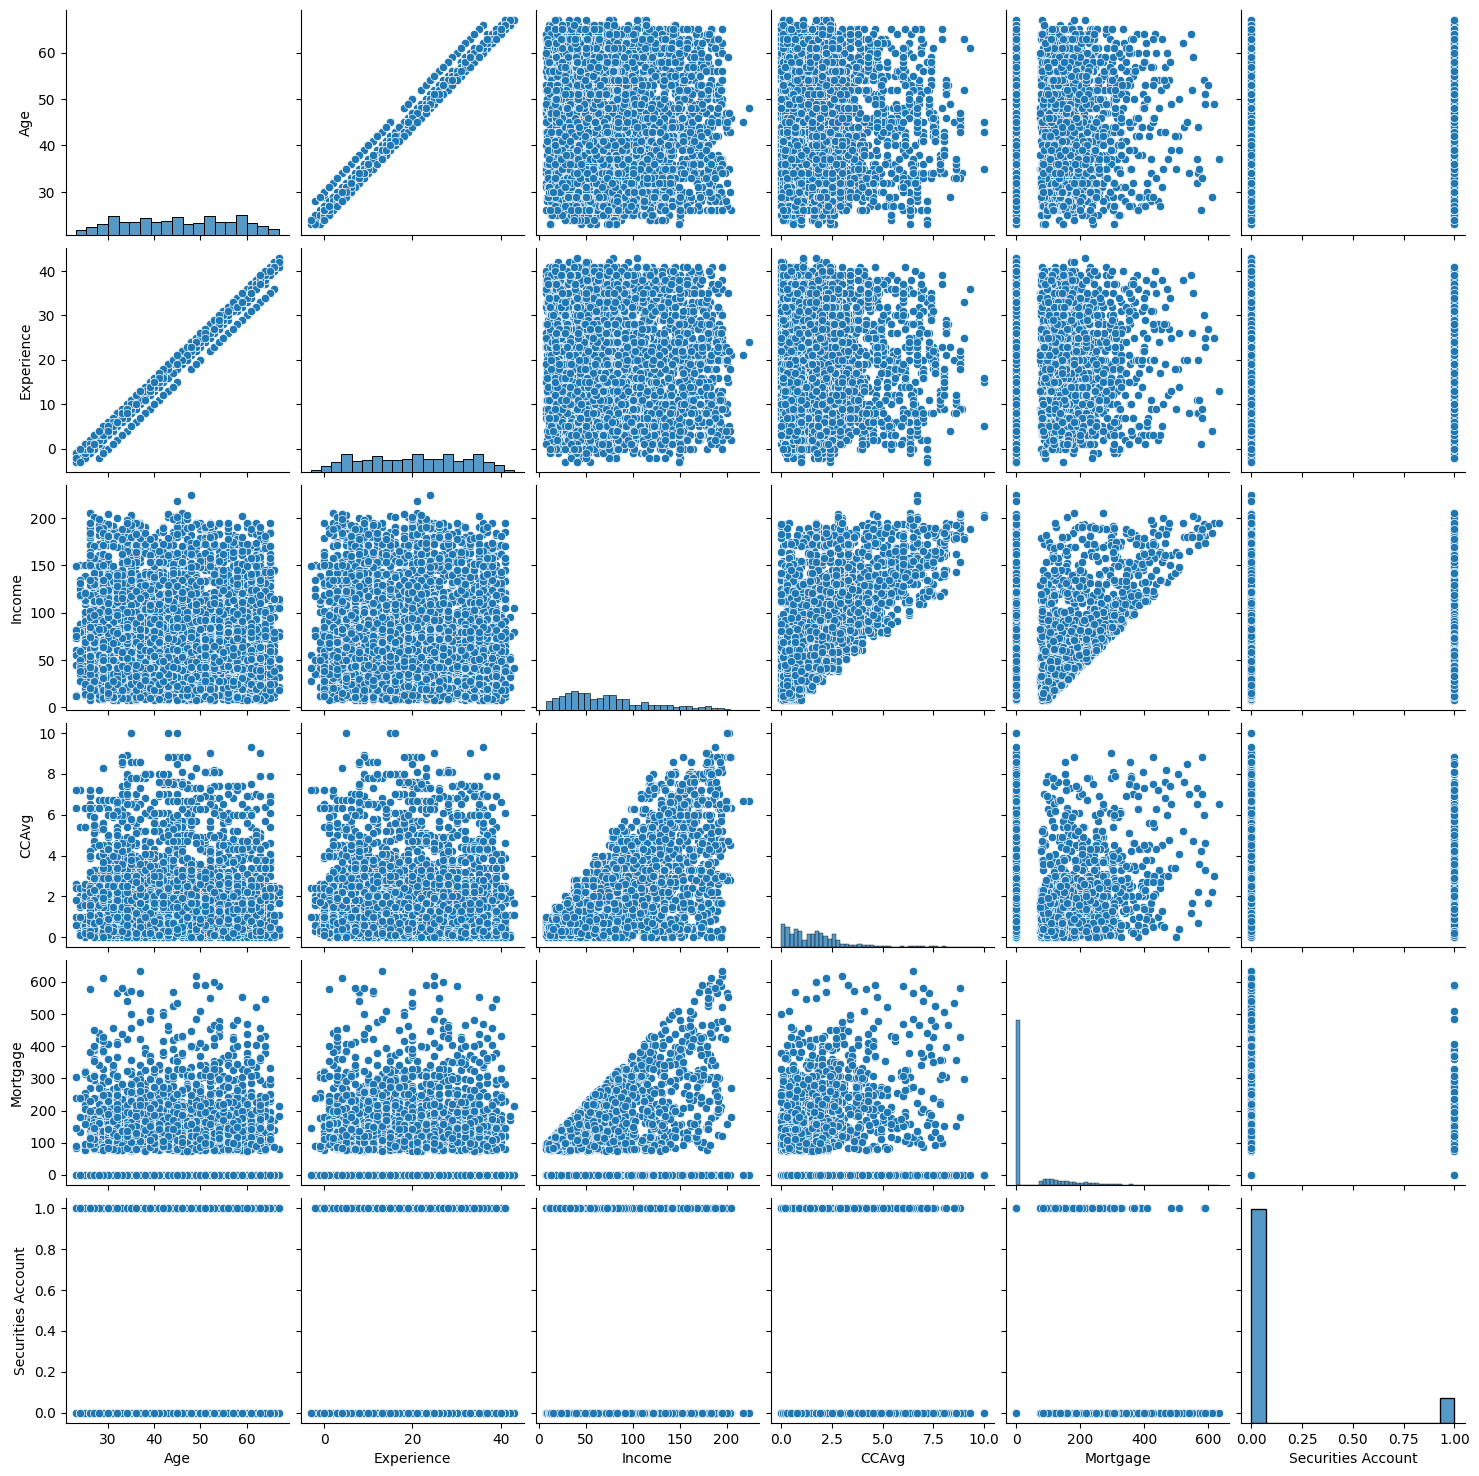

In [133]:
#Creating a pairplot to observe the corelation between the 6 features

sns.pairplot(BPL_F)
plt.show()

In [134]:
#finding corelation between experience and age

BPL_F['Experience'].corr(BPL_F['Age'])

0.9942148569683319

As experience and Age features are highly corelated, we will exclude the experience from consideration, so we have only 5 features now ('Age', 'Income', 'CCAvg', 'Mortgage', 'Securities Account')

###Training the model with 5 features (To find top 3 features)

In [135]:
BPL_F = BPL_F[['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities Account']]
BPL_F.head()

,Age,Income,CCAvg,Mortgage,Securities Account
0,25,49,1.6,0,1
1,45,34,1.5,0,1
2,39,11,1.0,0,0
3,35,100,2.7,0,0
4,35,45,1.0,0,0


In [136]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(BPL_F, BPL_T, test_size=0.2, random_state=42)

In [137]:
from sklearn.svm import SVC, LinearSVC
BPL_model = LinearSVC(random_state=42)

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
#using gridsearchCV for training with hyper parameter

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }

grid_search = GridSearchCV(BPL_model, param_grid, cv=5)
grid_search.fit(Xtrain, Ytrain)

acc_table = pd.DataFrame(grid_search.cv_results_)
acc_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005430,0.000917,0.001715,0.000058,0.0001,{'C': 0.0001},0.70625,0.70625,0.705,0.705,0.705,0.7055,0.000612,1
1,0.005153,0.000607,0.001827,0.000300,0.0010,{'C': 0.001},0.70625,0.70625,0.705,0.705,0.705,0.7055,0.000612,1
2,0.005599,0.000695,0.001566,0.000038,0.0100,{'C': 0.01},0.70625,0.70625,0.705,0.705,0.705,0.7055,0.000612,1
3,0.005279,0.000216,0.001582,0.000065,0.1000,{'C': 0.1},0.70625,0.70625,0.705,0.705,0.705,0.7055,0.000612,1
4,0.005180,0.000330,0.001540,0.000086,1.0000,{'C': 1},0.70625,0.70625,0.705,0.705,0.705,0.7055,0.000612,1


In [140]:
acc_table = acc_table[['param_C', 'mean_test_score' ]]

In [141]:
acc_table

,param_C,mean_test_score
0,0.0001,0.7055
1,0.0010,0.7055
2,0.0100,0.7055
3,0.1000,0.7055
4,1.0000,0.7055
5,10.0000,0.7055
6,100.0000,0.7055
7,1000.0000,0.7055


mean test score for all the values of C is same 0.7055, we will use any one of them for tredicting test values

In [142]:
grid_search.best_params_

{'C': 0.0001}

In [143]:
BPLC_model = LinearSVC(random_state=42, C=0.0001)
BPLC_model.fit(Xtrain, Ytrain)

LinearSVC(C=0.0001, random_state=42)

In [144]:
#predicting values

BPLC_Ypred = BPLC_model.predict(Xtest)
accuracy_score(Ytest, BPLC_Ypred)

0.708

In [145]:
confusion_matrix(Ytest, BPLC_Ypred)

array([[708,   0],
       [292,   0]])

In [146]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, BPLC_Ypred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


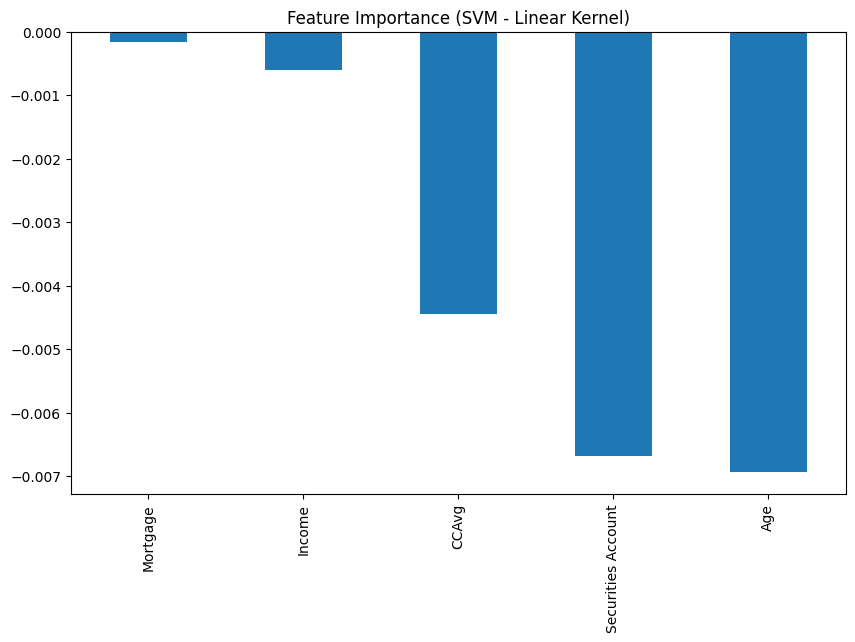

In [147]:
#finding effect of features on outcome

importances = pd.Series(BPLC_model.coef_.ravel(), index=Xtrain.columns)

# Visualize
plt.figure(figsize=(10, 6))
importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (SVM - Linear Kernel)")
plt.show()

Selecting the top 3 features we will consider top 3 absolute coefficient values, which are (CCAvg, Securities Account, Age).

###Training Linear SVM Model with 3 features and 1 target Variable

In [148]:
Final_BPL_F = BPL_F[['Age', 'CCAvg', 'Securities Account']]
Final_BPL_T = BPL_T

In [149]:
BPL_trainX, BPL_testX, BPL_trainY, BPL_testY = train_test_split(Final_BPL_F, Final_BPL_T,test_size=.2, random_state=42)

Final_BPL_model = LinearSVC(random_state=42)

BPL_param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

BPL_grid_search = GridSearchCV(Final_BPL_model, BPL_param_grid, cv=5)
BPL_grid_search.fit(BPL_trainX, BPL_trainY)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [150]:
accuracy_table = pd.DataFrame(BPL_grid_search.cv_results_)
accuracy_table[['param_C','mean_test_score']]


,param_C,mean_test_score
0,0.0001,0.7055
1,0.0010,0.7055
2,0.0100,0.7055
3,0.1000,0.7055
4,1.0000,0.7055
5,10.0000,0.7055
6,100.0000,0.7055
7,1000.0000,0.7055


In [151]:
BPL_classifier = BPL_grid_search.best_estimator_
BPL_Pred_Y = BPL_classifier.predict(BPL_testX)
print(classification_report(BPL_testY, BPL_Pred_Y))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Output by Other kernels

In [152]:
BPL_multimodel = SVC(random_state=42)

multi_model_params = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': [0.0001]
}

Multi_kernel_clf = GridSearchCV(BPL_multimodel, multi_model_params, cv=5)
Multi_kernel_clf.fit(BPL_trainX, BPL_trainY)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.0001], 'kernel': ['poly', 'rbf', 'sigmoid']})

In [153]:
Multi_model_accuracy_table = pd.DataFrame(Multi_kernel_clf.cv_results_)
Multi_model_accuracy_table[['param_C', 'mean_test_score']]

,param_C,mean_test_score
0,0.0001,0.7055
1,0.0001,0.7055
2,0.0001,0.7055


all the kernels have same accuracy

# Question 4

Load the IRIS dataset. The dataset consists of 150 samples of iris flowers, each belonging to
one of three species (setosa, versicolor, or virginica). Each sample includes four features: sepal
length, sepal width, petal length, and petal width.
1. Visualize the distribution of each feature and the class distribution.
2. Encode the categorical target variable (species) into numerical values.
3. Split the dataset into training and testing sets (use an appropriate ratio).
4. Decision Tree Model
i. Build a decision tree classifier using the training set.
ii. Visualize the resulting decision tree.
iii. Make predictions on the testing set and evaluate the model's performance using
appropriate metrics (e.g., accuracy, confusion matrix).
5. Random Forest Model
i. Build a random forest classifier using the training set.
ii. Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary.
iii. Make predictions on the testing set and evaluate the model's performance using
appropriate metrics and compare it with the decision tree model

###Preprocessing

In [154]:
# loading iris dataset with names of species
from sklearn.datasets import load_iris

iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target_names[iris_data.target]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [155]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking Unique values

In [156]:

for i in iris.columns:
  print(f'Unique values of {i} is {iris[i].unique()}')

Unique values of sepal length (cm) is [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
Unique values of sepal width (cm) is [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
Unique values of petal length (cm) is [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
Unique values of petal width (cm) is [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Unique values of species is ['setosa' 'versicolor' 'virginica']


1.Visualize the distribution of each feature and the class distribution

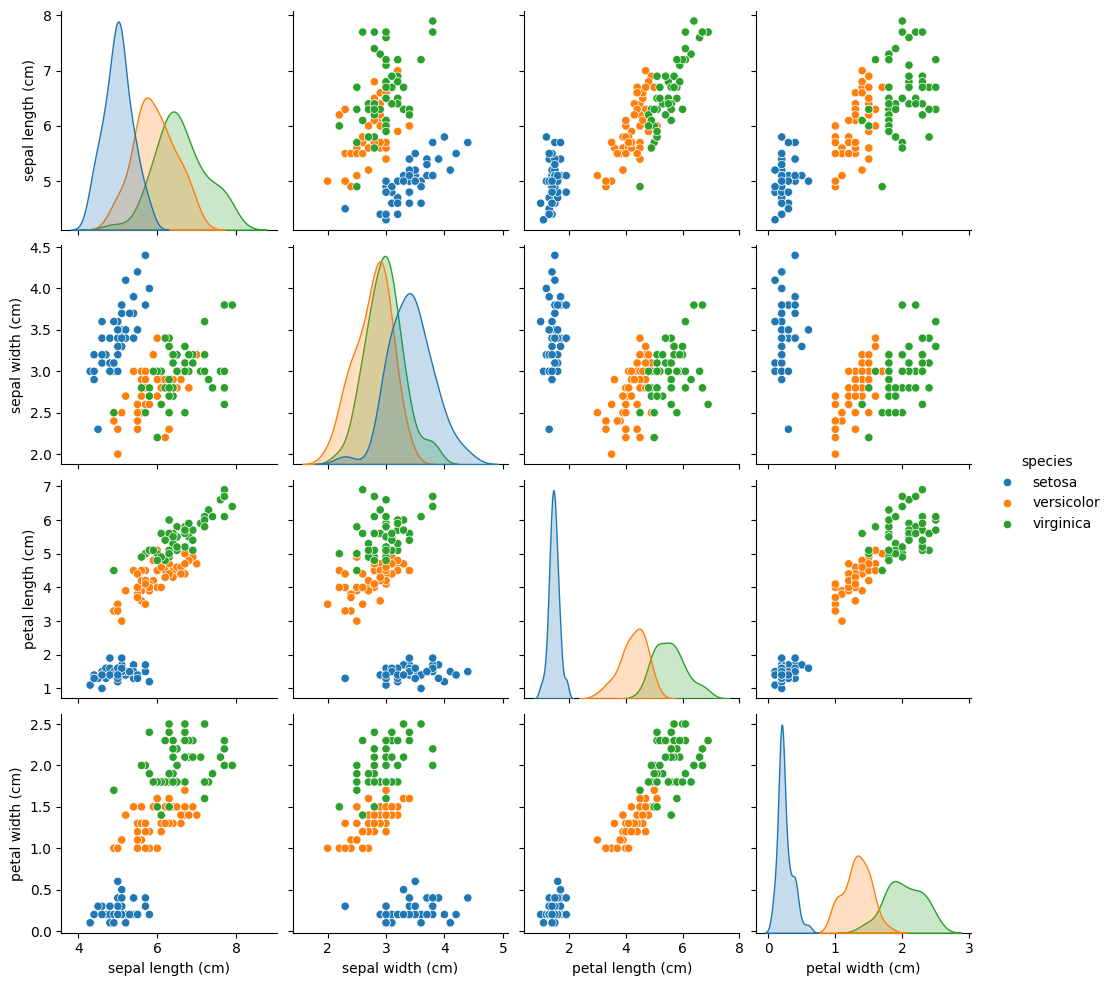

In [157]:
sns.pairplot(iris, hue='species')
plt.show()

2.Encode the categorical target variable (species) into numerical values.

In [158]:
#Encode the categorical target variable (species) into numerical values.

encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [159]:
#Split the dataset into training and testing sets.

iris_x = iris.drop('species', axis=1)
iris_y = iris['species']

iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x, iris_y, test_size=0.2, random_state=42)

###Training Decision Tree Model

i. Build a decision tree classifier using the training set.

In [160]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [161]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(iris_x_train, iris_y_train)

DecisionTreeClassifier(random_state=42)

ii. Visualize the resulting decision tree.

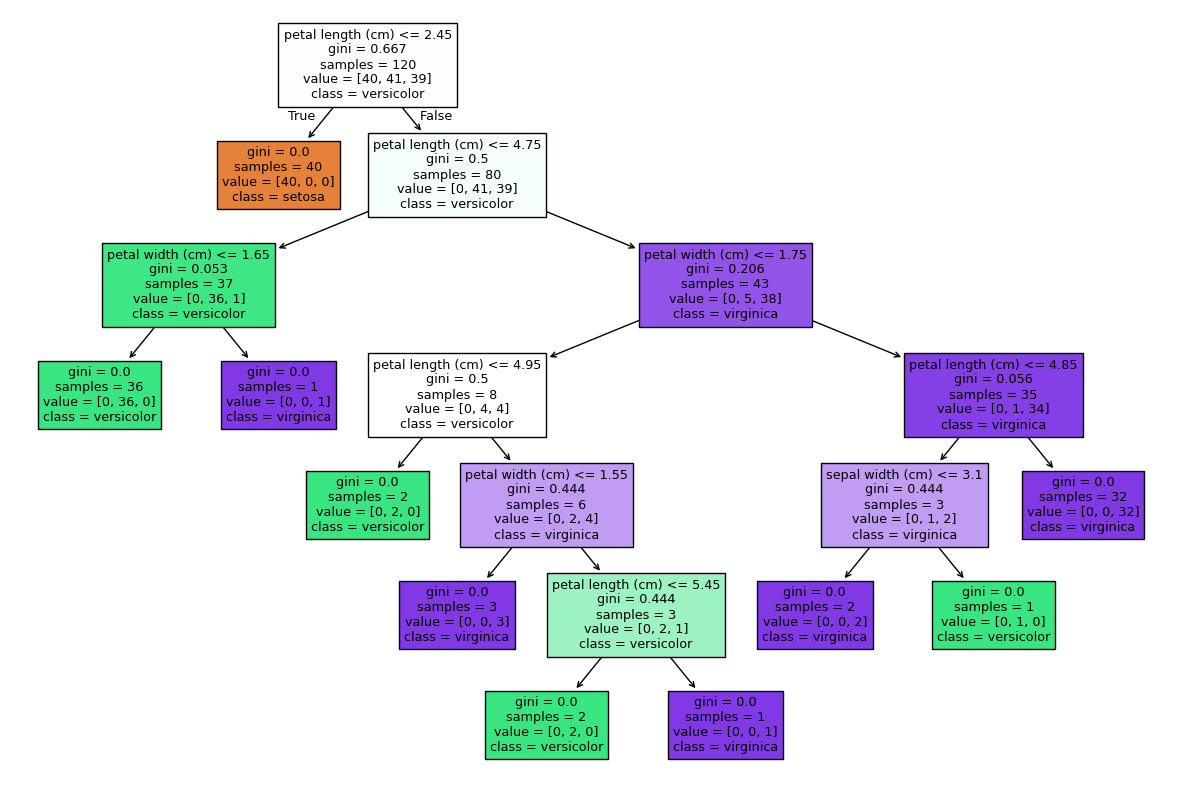

In [162]:
#Visualize the resulting decision tree

plt.figure(figsize=(15, 10))
plot_tree(DTC, filled=True, feature_names=iris_x.columns, class_names=iris_data.target_names)
plt.show()

iii. Make predictions on the testing set and evaluate the model's performance using appropriate metrics

In [163]:
DTC_Y_Pred = DTC.predict(iris_x_test)

accuracy_score(iris_y_test, DTC_Y_Pred)

1.0

In [164]:
confusion_matrix(iris_y_test, DTC_Y_Pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [165]:
print(classification_report(iris_y_test, DTC_Y_Pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###Training Random Forest Model

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
RFC = RandomForestClassifier(random_state=42)

param = {'n_estimators': [50, 100,150,200,250],
         'max_depth': [None, 10, 20, 30],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4],
         'max_features': ['auto', 'sqrt', 'log2']
         }

RF_classifier = GridSearchCV(RFC, param, cv=5)
RF_classifier.fit(iris_x_train, iris_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [168]:
RF_classifier.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [169]:
Final_RFC = RF_classifier.best_estimator_

In [170]:
RFC_pedY = Final_RFC.predict(iris_x_test)

accuracy_score(iris_y_test, RFC_pedY)

1.0

In [171]:
print(classification_report(iris_y_test, RFC_pedY))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [172]:
confusion_matrix(iris_y_test, RFC_pedY)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

###Comparing Random forest classifier and decision tree classifier

Both the classifiers have 100 % accuraccy